In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [204]:
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [205]:
len(train_data)

891

In [206]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [207]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [208]:
train_data = train_data[[not i for i in train_data['Embarked'].isnull()]]
len(train_data)

889

In [209]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


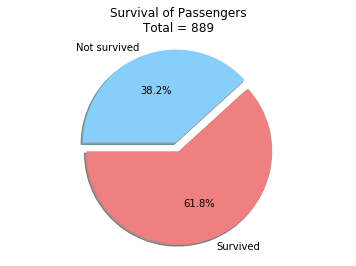

In [259]:
labels = 'Survived', 'Not survived'

sizes = train_data.groupby('Survived')['PassengerId'].count().values
colors = [ 'lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title('Survival of Passengers\nTotal = '+str(sizes.sum()))
plt.show()

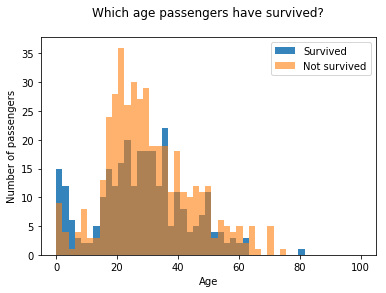

In [210]:

bins = numpy.linspace(0, 100, 50)

plt.hist(train_data['Age'][train_data['Survived']==1], bins, alpha=0.9, label='Survived')
plt.hist(train_data['Age'][train_data['Survived']==0], bins, alpha=0.6, label='Not survived')
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.title('Which age passengers have survived?\n')
plt.legend(loc='upper right')
plt.show()

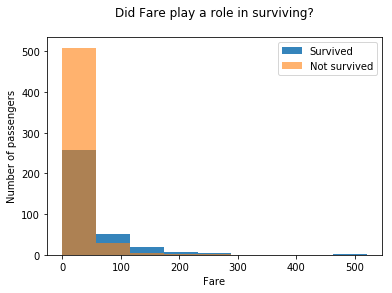

In [211]:

bins = numpy.linspace(0, 520, 10)

plt.hist(train_data['Fare'][train_data['Survived']==1], bins, alpha=0.9, label='Survived')
plt.hist(train_data['Fare'][train_data['Survived']==0], bins, alpha=0.6, label='Not survived')
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.title('Did Fare play a role in surviving?\n')
plt.legend(loc='upper right')
plt.show()

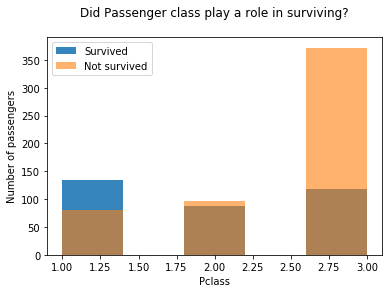

In [213]:

bins = numpy.linspace(1, 3, 6)

plt.hist(train_data['Pclass'][train_data['Survived']==1], bins, alpha=0.9, label='Survived')
plt.hist(train_data['Pclass'][train_data['Survived']==0], bins, alpha=0.6, label='Not survived')
plt.xlabel('Pclass')
plt.ylabel('Number of passengers')
plt.title('Did Passenger class play a role in surviving?\n')
plt.legend(loc='upper left')
plt.show()

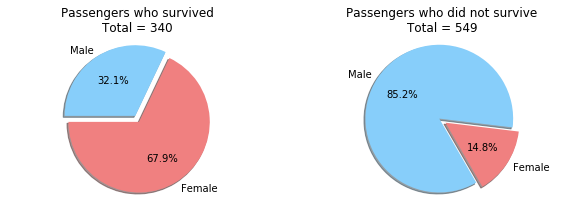

In [249]:
plt.figure(figsize=(10,3))
# Data to plot
labels = 'Female', 'Male'

sizes = train_data[train_data['Survived']==1].groupby('Sex')['PassengerId'].count().values
colors = [ 'lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice
plt.subplot(1,2,1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title('Passengers who survived\nTotal = '+str(sizes.sum()))

plt.subplot(1,2,2)
sizes = train_data[train_data['Survived']==0].groupby('Sex')['PassengerId'].count().values
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=300)
plt.axis('equal')
plt.title('Passengers who did not survive\nTotal = '+str(sizes.sum()))
plt.show()

In [260]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [261]:
print('train size',len(train_data))
print('test size',len(test_data))

train size 889
test size 418


In [262]:
data = train_data
print(data.shape)
data.head()

(889, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [263]:
fare = train_data['Fare'].fillna(0)
fare1 = (fare-fare.mean())/fare.std()

In [264]:
X = data[['Pclass','Sex','Age','SibSp','Parch','Embarked']]
X['Sex'] = X['Sex'].apply(lambda x : 0 if 'female' in x else 1) 
X.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,22.0,1,0,S
1,1,0,38.0,1,0,C
2,3,0,26.0,0,0,S
3,1,0,35.0,1,0,S
4,3,1,35.0,0,0,S


In [265]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
Pclass_encoded = enc.fit_transform(data['Pclass'][:,None])
Pclass_encoded.toarray()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [266]:
X = X.drop(['Pclass'] ,axis=1)
X.head()

,Sex,Age,SibSp,Parch,Embarked
0,1,22.0,1,0,S
1,0,38.0,1,0,C
2,0,26.0,0,0,S
3,0,35.0,1,0,S
4,1,35.0,0,0,S


In [267]:
from collections import Counter
print(Counter(data['Embarked'].fillna('Not Mentioned')))

Counter({'S': 644, 'C': 168, 'Q': 77})


In [268]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

Embarked_le_encoded = le.fit_transform(data['Embarked'].fillna('Not Mentioned')[:,None])
print(Counter(Embarked_le_encoded))

Counter({2: 644, 0: 168, 1: 77})


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [269]:
Embarked_le_encoded.shape

(889,)

In [270]:
Embarked_encoded = enc.fit_transform(Embarked_le_encoded[:,None])
Embarked_encoded.toarray()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [271]:
X = X.drop(['Embarked'] ,axis=1)
X.head()

,Sex,Age,SibSp,Parch
0,1,22.0,1,0
1,0,38.0,1,0
2,0,26.0,0,0
3,0,35.0,1,0
4,1,35.0,0,0


In [272]:
X['Age'] = (X['Age']-X['Age'].mean())/X['Age'].std()

In [273]:
X.head()

,Sex,Age,SibSp,Parch
0,1,-0.527298,1,0
1,0,0.576688,1,0
2,0,-0.251301,0,0
3,0,0.369691,1,0
4,1,0.369691,0,0


In [274]:
X= X.fillna(0)

In [275]:
X1 = np.array(X)
X1

array([[ 1.        , -0.52729787,  1.        ,  0.        ],
       [ 0.        ,  0.57668847,  1.        ,  0.        ],
       [ 0.        , -0.25130129,  0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  1.        ,  2.        ],
       [ 1.        , -0.25130129,  0.        ,  0.        ],
       [ 1.        ,  0.16269359,  0.        ,  0.        ]])

In [276]:
X1.shape

(889, 4)

In [284]:
X1[0]

array([ 1.        , -0.52729787,  1.        ,  0.        ])

In [277]:
Embarked_encoded.toarray().shape

(889, 3)

In [278]:
Pclass_encoded.toarray().shape

(889, 3)

In [279]:
X2 = np.concatenate((X1, Embarked_encoded.toarray(),Pclass_encoded.toarray(),fare1[:,None]), axis=1)

In [280]:
fare[:,None].shape

(889, 1)

In [281]:
X2.shape

(889, 11)

In [285]:
X2[0]

array([ 1.        , -0.52729787,  1.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
       -0.49995832])

In [286]:
y = data['Survived'][:,None]

In [287]:
y.shape

(889, 1)

In [288]:
X2.shape

(889, 11)

In [308]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.1, random_state=42)

In [309]:
X_train.shape

(800, 11)

In [311]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy Score')
print(accuracy_score(y_test, y_pred))

Accuracy Score
0.8202247191011236


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [347]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy Score')
print(accuracy_score(y_test, y_pred))

Accuracy Score
0.8426966292134831


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [319]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = LogisticRegression(solver='lbfgs', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
eclf1 = eclf1.fit(X_train, y_train)

y_pred = eclf1.predict(X_test)
print('Accuracy Score')
print(accuracy_score(y_test, y_pred))

Accuracy Score
0.8089887640449438


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [332]:

clf = RandomForestClassifier(n_estimators=1000, random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy Score')
print(accuracy_score(y_test, y_pred))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy Score
0.7865168539325843


In [333]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [334]:

test_data1 = test_data[['Pclass','Sex','Age','SibSp','Parch','Embarked']]
test_data1['Sex'] = test_data1['Sex'].apply(lambda x : 0 if 'female' in x else 1) 

test_Pclass_encoded = enc.fit_transform(test_data['Pclass'][:,None])
test_Embarked_le_encoded = le.fit_transform(test_data['Embarked'].fillna('Not Mentioned')[:,None])
test_Embarked_encoded = enc.fit_transform(test_Embarked_le_encoded[:,None])

test_data1 = test_data1.drop(['Embarked'] ,axis=1)
test_data1 = test_data1.drop(['Pclass'] ,axis=1)

test_data1['Age'] = (test_data1['Age']-test_data1['Age'].mean())/test_data1['Age'].std()

test_data1 = test_data1.fillna(0)
Y1 = np.array(test_data1)

test_fare = test_data['Fare'].fillna(0)
test_fare1 = (test_fare-test_fare.mean())/test_fare.std()

Y2 = np.concatenate((Y1, test_Embarked_encoded.toarray(),test_Pclass_encoded.toarray(),test_fare1[:,None]), axis=1)

Y2.shape

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/an

(418, 11)

In [ ]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy Score')
print(accuracy_score(y_test, y_pred))

In [348]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X2, y)
y_pred = clf.predict(Y2)
y_pred

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [339]:
len(y_pred)

418

In [340]:
len(test_data)

418

In [349]:
submit = pd.DataFrame(y_pred,test_data['PassengerId'])
submit = submit.reset_index()
print(submit.columns)
submit.columns =['PassengerId','Survived']
print(submit.columns)
submit.to_csv('submission.csv',index=False)
submit.head()

Index(['PassengerId', 0], dtype='object')
Index(['PassengerId', 'Survived'], dtype='object')


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [351]:
%%html
<img src="./kaggle_leader_board.png",width=60,height=60>